# Importar librerías + data

In [1]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, models, utils, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [31]:
# Load data from parquet file
data = (
    pl.scan_parquet('datasets/teams/battlelog_train.parquet')
    ).collect()

data.columns

['event_mode',
 'event_map',
 'battle_team1_player1_brawler_name',
 'battle_team1_player2_brawler_name',
 'battle_team1_player3_brawler_name',
 'battle_team2_player1_brawler_name',
 'battle_team2_player2_brawler_name',
 'battle_team2_player3_brawler_name',
 'battle_team1_player1_brawler_Class',
 'battle_team1_player2_brawler_Class',
 'battle_team1_player3_brawler_Class',
 'battle_team2_player1_brawler_Class',
 'battle_team2_player2_brawler_Class',
 'battle_team2_player3_brawler_Class',
 'battle_team1_player1_brawler_Role',
 'battle_team1_player2_brawler_Role',
 'battle_team1_player3_brawler_Role',
 'battle_team2_player1_brawler_Role',
 'battle_team2_player2_brawler_Role',
 'battle_team2_player3_brawler_Role',
 'battle_team1_player1_brawler_Movement_Speed',
 'battle_team1_player2_brawler_Movement_Speed',
 'battle_team1_player3_brawler_Movement_Speed',
 'battle_team2_player1_brawler_Movement_Speed',
 'battle_team2_player2_brawler_Movement_Speed',
 'battle_team2_player3_brawler_Movement_S

Limpiar categorías

In [32]:
def one_hot_encoding(df, col, prefix):
	"""
	Función para convertir las etiquetas de texto a valores numéricos
	y luego convertir los valores numéricos a "one-hot encoding"
	"""	

	y = df[col]
	x = df.drop([col])

	le = LabelEncoder()
	y = le.fit_transform(y)

	# Convertir los valores numéricos a "one-hot encoding"
	y = pl.DataFrame(utils.to_categorical(y))

	y = y.select([pl.col('column_' + str(i)).alias(prefix + '_' + item) for i, item in enumerate(le.classes_)])
	
	# unir el dataframe con las categorias codificadas
	df_encoded = pl.concat([x, y], how='horizontal')

	return df_encoded

cols = [
	['event_mode', 'EM'],
	['event_map', 'MP'],
	['battle_team1_player1_brawler_name', 'T1B1'],
	['battle_team1_player2_brawler_name', 'T1B2'],
	['battle_team1_player3_brawler_name', 'T1B3'],
	['battle_team2_player1_brawler_name', 'T2B1'],
	['battle_team2_player2_brawler_name', 'T2B2'],
	['battle_team2_player3_brawler_name', 'T2B3'],
	['battle_team1_player1_brawler_Class', 'T1C1'],
	['battle_team1_player2_brawler_Class', 'T1C2'],
	['battle_team1_player3_brawler_Class',	'T1C3'],
	['battle_team2_player1_brawler_Class', 'T2C1'],
	['battle_team2_player2_brawler_Class', 'T2C2'],
	['battle_team2_player3_brawler_Class', 'T2C3'],
	['battle_team1_player1_brawler_Role',	'T1R1'],
	['battle_team1_player2_brawler_Role',	'T1R2'],
	['battle_team1_player3_brawler_Role',	'T1R3'],
	['battle_team2_player1_brawler_Role',	'T2R1'],
	['battle_team2_player2_brawler_Role',	'T2R2'],
	['battle_team2_player3_brawler_Role',	'T2R3'],
	['battle_team1_player1_brawler_Movement_Speed', 'T1S1'],
	['battle_team1_player2_brawler_Movement_Speed', 'T1S2'],
	['battle_team1_player3_brawler_Movement_Speed', 'T1S3'],
	['battle_team2_player1_brawler_Movement_Speed', 'T2S1'],
	['battle_team2_player2_brawler_Movement_Speed', 'T2S2'],
	['battle_team2_player3_brawler_Movement_Speed', 'T2S3'],
	['battle_team1_player1_brawler_Range', 'T1G1'],
	['battle_team1_player2_brawler_Range', 'T1G2'],
	['battle_team1_player3_brawler_Range', 'T1G3'],
	['battle_team2_player1_brawler_Range', 'T2G1'],
	['battle_team2_player2_brawler_Range', 'T2G2'],
	['battle_team2_player3_brawler_Range',	'T2G3'],
]

for col in cols:
	data = one_hot_encoding(data, col[0], col[1])

data.columns

['winner_team',
 'barriers',
 'barriers_center',
 'bushes',
 'bushes_center',
 'waterProp',
 'avg_brawler_Range_Num_team1',
 'avg_brawler_Range_Num_team2',
 'avg_brawler_trophies_team1',
 'avg_brawler_trophies_team2',
 'avg_brawler_Health_team1',
 'avg_brawler_Health_team2',
 'avg_brawler_Speed_Num_team1',
 'avg_brawler_Speed_Num_team2',
 'avg_brawler_winrate_team1',
 'avg_brawler_winrate_team2',
 'avg_brawler_winrate_overall_team1',
 'avg_brawler_winrate_overall_team2',
 'avg_highestTrophies_team1',
 'avg_highestTrophies_team2',
 'avg_trophies_team1',
 'avg_trophies_team2',
 'avg_expPoints_team1',
 'avg_expPoints_team2',
 'avg_team_victories_team1',
 'avg_team_victories_team2',
 'max_brawler_Range_Num_team1',
 'max_brawler_Range_Num_team2',
 'max_brawler_trophies_team1',
 'max_brawler_trophies_team2',
 'max_brawler_Health_team1',
 'max_brawler_Health_team2',
 'max_brawler_Speed_Num_team1',
 'max_brawler_Speed_Num_team2',
 'max_brawler_winrate_team1',
 'max_brawler_winrate_team2',
 'ma

In [45]:
# corregir valores columna winner_team restándole 1

data = data.with_columns(pl.col('winner_team') - 1)

data['winner_team'].value_counts()

winner_team,counts
i8,u32
0,152932
1,155825


Generar test split

In [46]:
seed=14692

data = data.to_pandas()

train, test = train_test_split(data, test_size = 0.7, random_state=seed)

train = pd.DataFrame(train)
test = pd.DataFrame(test)

print(str(train.shape) + " train samples")
print(str(test.shape) + " test samples")

(92627, 675) train samples
(216130, 675) test samples


# Entrenando y comparando diferentes batchsizes

In [47]:
model = models.Sequential([
    layers.Dense(674, input_dim=674, activation='relu'),
    layers.Dense(337, activation='relu'),
    layers.Dense(337, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 674)               454950    
                                                                 
 dense_18 (Dense)            (None, 337)               227475    
                                                                 
 dense_19 (Dense)            (None, 337)               113906    
                                                                 
 dense_20 (Dense)            (None, 1)                 338       
                                                                 
Total params: 796,669
Trainable params: 796,669
Non-trainable params: 0
_________________________________________________________________


Compilando modelos

In [48]:
optimizer = 'adam' # 'rmsprop' 'sgd'
loss = 'binary_crossentropy' # ideal para clasificación binaria
metrics = ['accuracy', 'Precision', 'Recall', 'FalseNegatives', 'FalsePositives', 'TrueNegatives', 'TruePositives']

def compile_model(model):
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

compile_model(model)

Entrenando modelos

In [51]:
batch_size_list = [512, 1024, 2048]

def train_models(model, train, epochs=500, verbose=True):
	history_dict = {}
	for batch_size in batch_size_list:
		print('Iniciando entrenamiento con batch: ' + str(batch_size))
		historial = model.fit(train.drop(['winner_team'], axis=1), train['winner_team'], epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=(test.drop(['winner_team'], axis=1), test['winner_team']))
		history_dict['batch_size_' + str(batch_size)] = historial.history
	return history_dict

trained_models = train_models(model, train)

Iniciando entrenamiento con batch: 512
Epoch 1/500
181/181 [==============================] - 11s 58ms/step - loss: 0.6359 - accuracy: 0.6570 - precision: 0.6596 - recall: 0.6589 - false_negatives: 15914.0000 - false_positives: 15860.0000 - true_negatives: 30115.0000 - true_positives: 30738.0000 - val_loss: 0.6265 - val_accuracy: 0.6587 - val_precision: 0.6462 - val_recall: 0.7167 - val_false_negatives: 30934.0000 - val_false_positives: 42836.0000 - val_true_negatives: 64121.0000 - val_true_positives: 78239.0000
Epoch 2/500
181/181 [==============================] - 9s 52ms/step - loss: 0.6202 - accuracy: 0.6580 - precision: 0.6615 - recall: 0.6575 - false_negatives: 15978.0000 - false_positives: 15698.0000 - true_negatives: 30277.0000 - true_positives: 30674.0000 - val_loss: 0.6153 - val_accuracy: 0.6605 - val_precision: 0.6661 - val_recall: 0.6572 - val_false_negatives: 37426.0000 - val_false_positives: 35959.0000 - val_true_negatives: 70998.0000 - val_true_positives: 71747.0000
Epoc

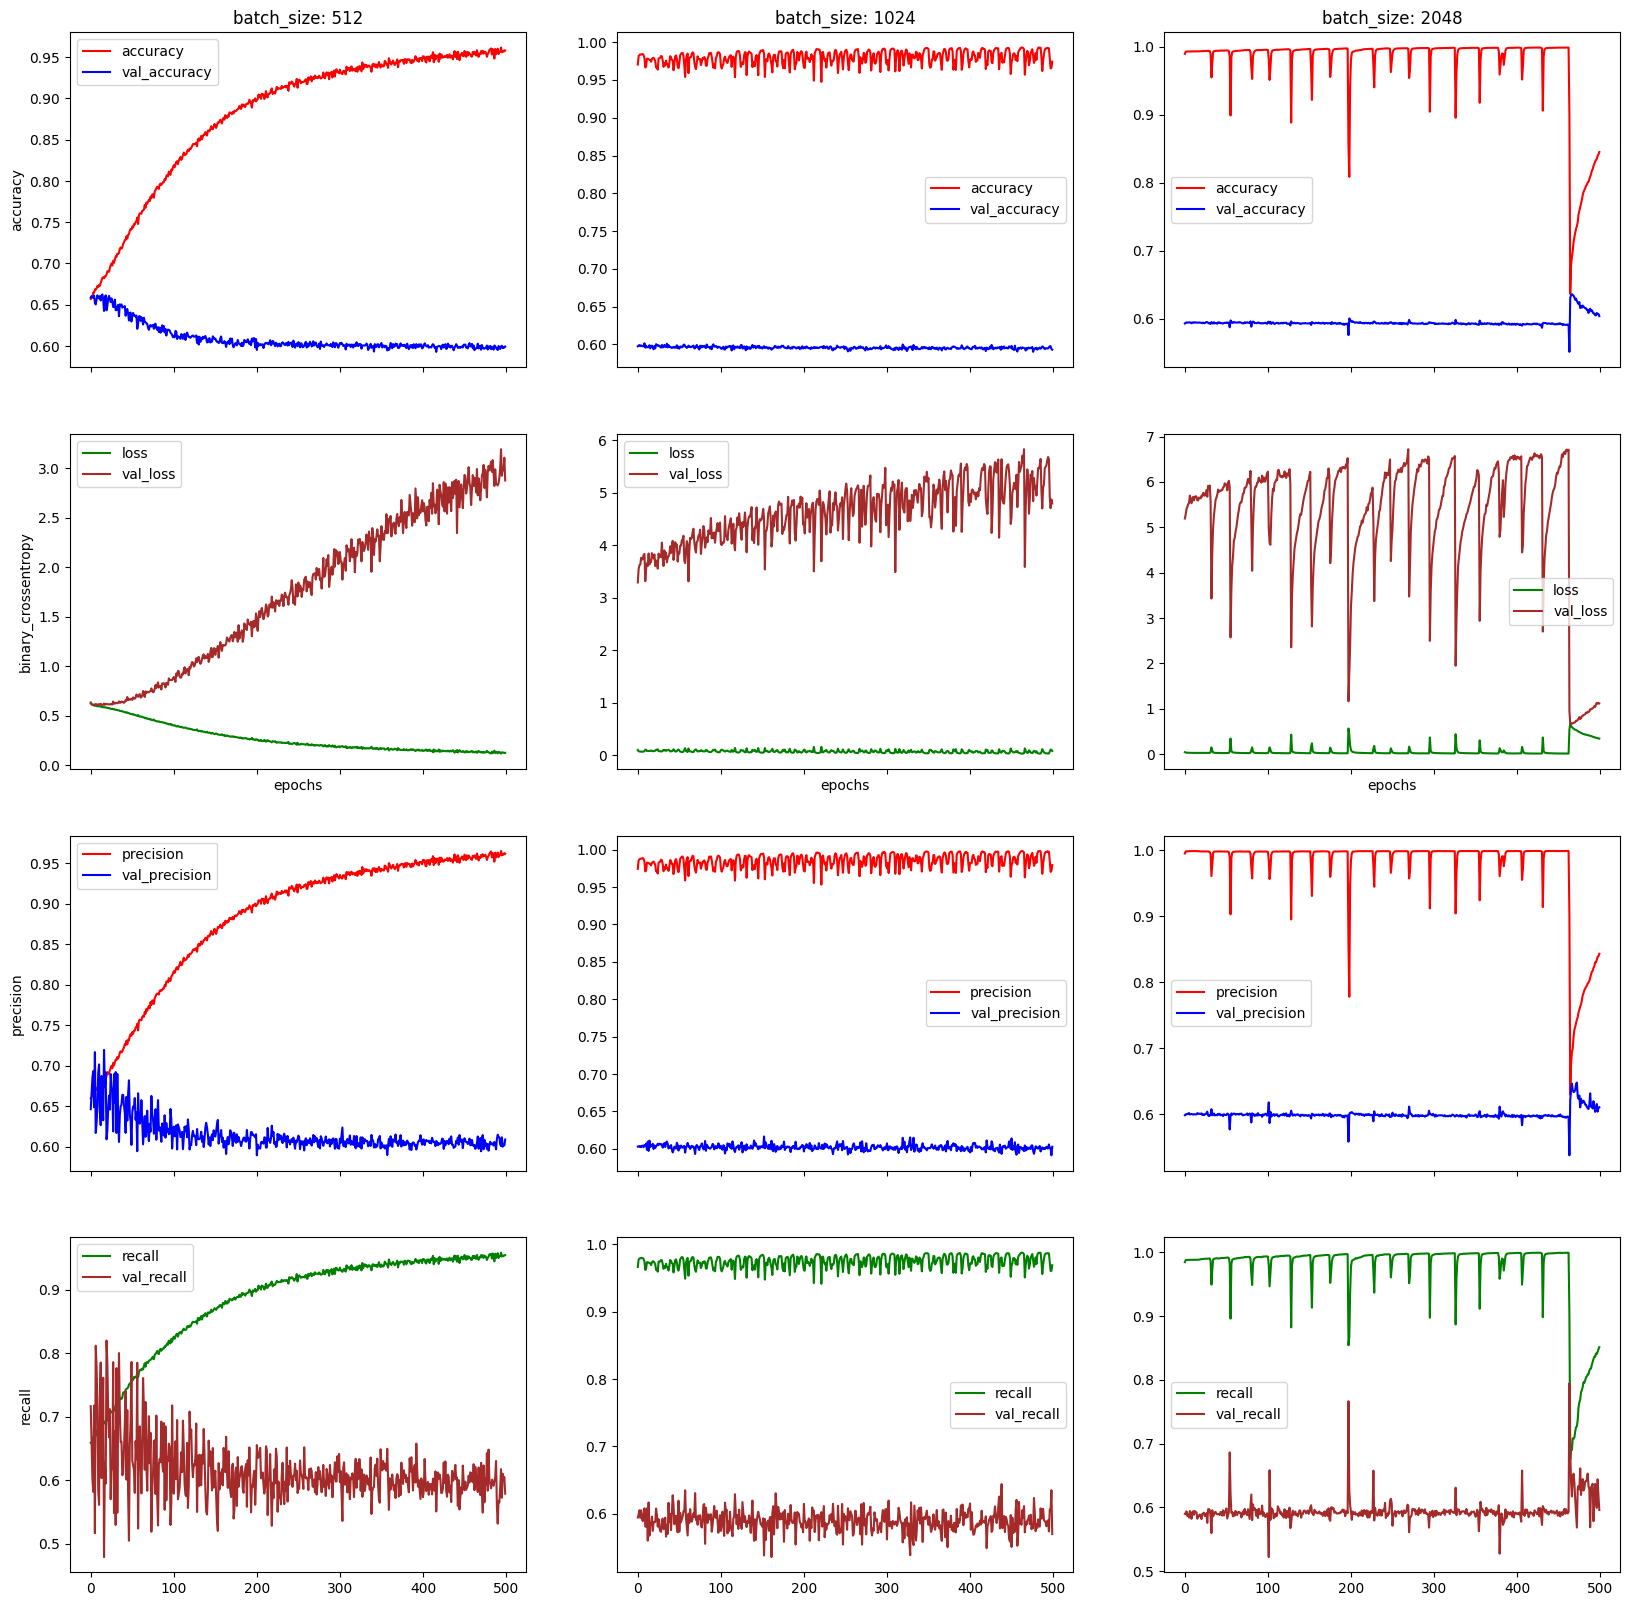

In [56]:
# Plot training & validation accuracy values

fig, ax = plt.subplots(4, len(batch_size_list), sharex=True, sharey=False, figsize=(20, 20))

ax[0, 0].set_ylabel("accuracy")
ax[1, 0].set_ylabel("binary_crossentropy")
ax[2, 0].set_ylabel("precision")
ax[3, 0].set_ylabel("recall")

for i, batch_size in enumerate(batch_size_list):
	ax[0, i].plot(trained_models['batch_size_' + str(batch_size)]['accuracy'], color='red', label='accuracy')
	ax[0, i].plot(trained_models['batch_size_' + str(batch_size)]['val_accuracy'], color='blue', label='val_accuracy')
	ax[1, i].plot(trained_models['batch_size_' + str(batch_size)]['loss'], color='green', label='loss')
	ax[1, i].plot(trained_models['batch_size_' + str(batch_size)]['val_loss'], color='brown', label='val_loss')
	ax[2, i].plot(trained_models['batch_size_' + str(batch_size)]['precision'], color='red', label='precision')
	ax[2, i].plot(trained_models['batch_size_' + str(batch_size)]['val_precision'], color='blue', label='val_precision')
	ax[3, i].plot(trained_models['batch_size_' + str(batch_size)]['recall'], color='green', label='recall')
	ax[3, i].plot(trained_models['batch_size_' + str(batch_size)]['val_recall'], color='brown', label='val_recall')

	ax[1, i].set_xlabel("epochs")
	ax[0, i].set_title("batch_size: " + str(batch_size))

	ax[0, i].legend()
	ax[1, i].legend()
	ax[2, i].legend()
	ax[3, i].legend()

plt.savefig('plots/cnn/batch_comparison.png')
plt.show()

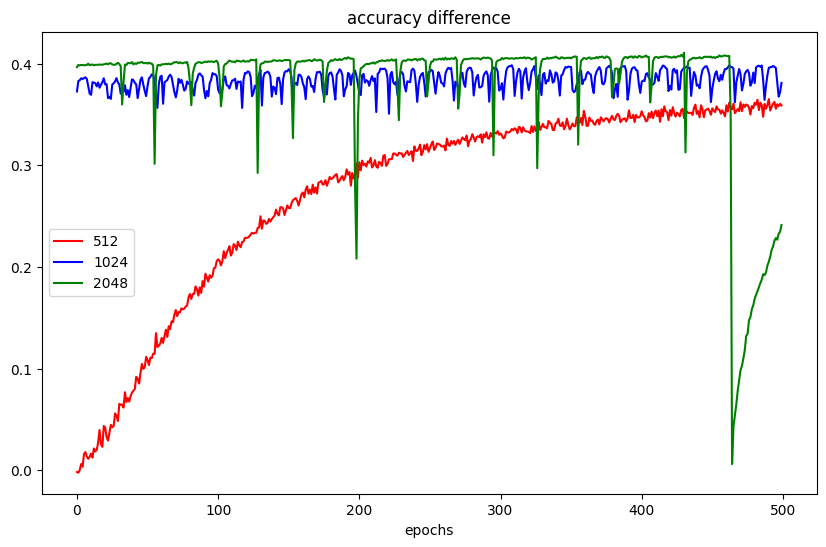

In [57]:
# grafico diferencia entre accuracy para cada batch size
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['red', 'blue', 'green', 'brown']

for i, batch_size in enumerate(batch_size_list):

	diff = np.array(trained_models['batch_size_' + str(batch_size)]['accuracy']) - np.array(trained_models['batch_size_' + str(batch_size)]['val_accuracy'])

	ax.plot(diff, color=colors[i], label=batch_size)

	ax.set_xlabel("epochs")
	ax.set_title("accuracy difference")
	ax.legend()

plt.savefig('plots/cnn/model_results_diff.png')
plt.show()

Es más conveniente utilizar batch_size = 512

# Comparación de modelos

In [105]:
model_1_gpt = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(674,1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
model_1_gpt.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 672, 32)           128       
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 336, 32)          0         
 g1D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 10752)             0         
                                                                 
 dense_83 (Dense)            (None, 64)                688192    
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_84 (Dense)            (None, 1)                 65        
                                                     

In [106]:
model_2_gpt = models.Sequential([
    layers.Dense(512, input_dim=674, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_2_gpt.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_85 (Dense)            (None, 512)               345600    
                                                                 
 dense_86 (Dense)            (None, 256)               131328    
                                                                 
 dense_87 (Dense)            (None, 128)               32896     
                                                                 
 dense_88 (Dense)            (None, 64)                8256      
                                                                 
 dense_89 (Dense)            (None, 1)                 65        
                                                                 
Total params: 518,145
Trainable params: 518,145
Non-trainable params: 0
_________________________________________________________________


In [107]:
model_3_gpt = models.Sequential([
    layers.Dense(256, input_dim=674, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_3_gpt.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 256)               172800    
                                                                 
 dense_91 (Dense)            (None, 128)               32896     
                                                                 
 dense_92 (Dense)            (None, 64)                8256      
                                                                 
 dense_93 (Dense)            (None, 1)                 65        
                                                                 
Total params: 214,017
Trainable params: 214,017
Non-trainable params: 0
_________________________________________________________________


In [108]:
model_4_gpt = models.Sequential([
    layers.Dense(512, input_dim=674, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model_4_gpt.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 512)               345600    
                                                                 
 dense_95 (Dense)            (None, 256)               131328    
                                                                 
 dense_96 (Dense)            (None, 128)               32896     
                                                                 
 dense_97 (Dense)            (None, 64)                8256      
                                                                 
 dropout_12 (Dropout)        (None, 64)                0         
                                                                 
 dense_98 (Dense)            (None, 1)                 65        
                                                                 
Total params: 518,145
Trainable params: 518,145
Non-t

In [109]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 674)               454950    
                                                                 
 dense_31 (Dense)            (None, 674)               454950    
                                                                 
 dense_32 (Dense)            (None, 337)               227475    
                                                                 
 dense_33 (Dense)            (None, 337)               113906    
                                                                 
 dense_34 (Dense)            (None, 1)                 338       
                                                                 
Total params: 1,251,619
Trainable params: 1,251,619
Non-trainable params: 0
_________________________________________________________________


In [110]:
model_list = [model_1_gpt, model_2_gpt, model_3_gpt, model_4_gpt, model]

for mod in model_list:
	compile_model(mod)

In [111]:

def train_models(model_list, train, test, epochs=30, verbose=True, batch_size=512):
	history_dict = {}
	for mod in model_list:
		print('Iniciando entrenamiento de modelo: ' + str(mod.name))
		historial = mod.fit(train.drop(['winner_team'], axis=1), train['winner_team'], epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=(test.drop(['winner_team'], axis=1), test['winner_team']))
		history_dict['model_' + str(mod.name)] = historial.history
	return history_dict

trained_models = train_models(model_list, train, test)

Iniciando entrenamiento de modelo: sequential_26
Epoch 1/30
181/181 [==============================] - 49s 258ms/step - loss: 0.7092 - accuracy: 0.5039 - precision: 0.5043 - recall: 0.8764 - false_negatives: 5767.0000 - false_positives: 40183.0000 - true_negatives: 5792.0000 - true_positives: 40885.0000 - val_loss: 0.6927 - val_accuracy: 0.5775 - val_precision: 0.5510 - val_recall: 0.8831 - val_false_negatives: 12758.0000 - val_false_positives: 78560.0000 - val_true_negatives: 28397.0000 - val_true_positives: 96415.0000
Epoch 2/30
181/181 [==============================] - 44s 245ms/step - loss: 0.6848 - accuracy: 0.5493 - precision: 0.5413 - recall: 0.6896 - false_negatives: 14479.0000 - false_positives: 27265.0000 - true_negatives: 18710.0000 - true_positives: 32173.0000 - val_loss: 0.6699 - val_accuracy: 0.6352 - val_precision: 0.6414 - val_recall: 0.6300 - val_false_negatives: 40394.0000 - val_false_positives: 38454.0000 - val_true_negatives: 68503.0000 - val_true_positives: 68779.

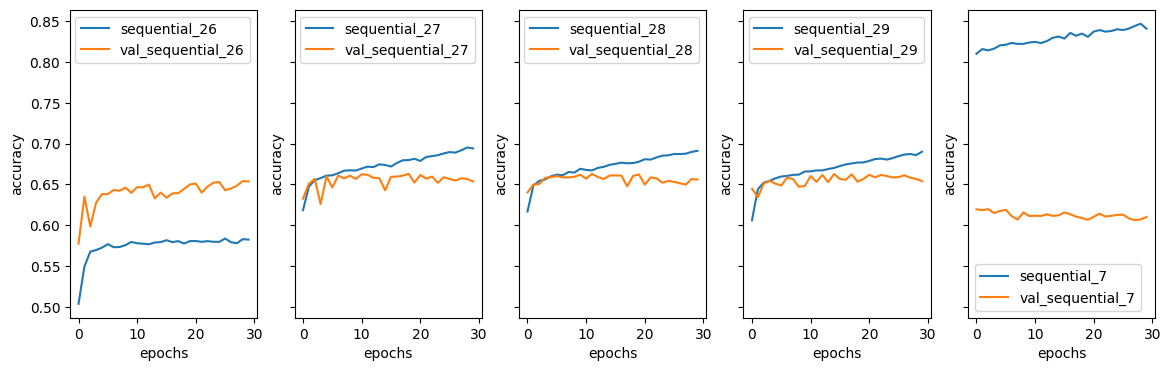

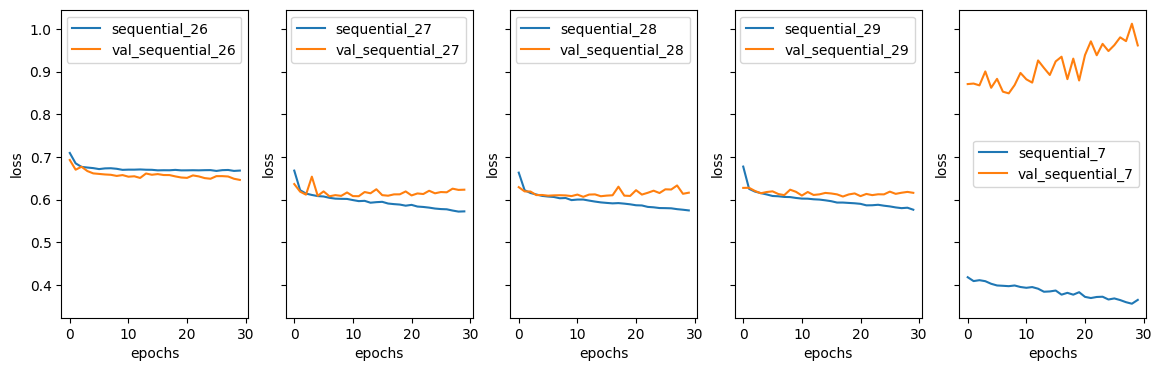

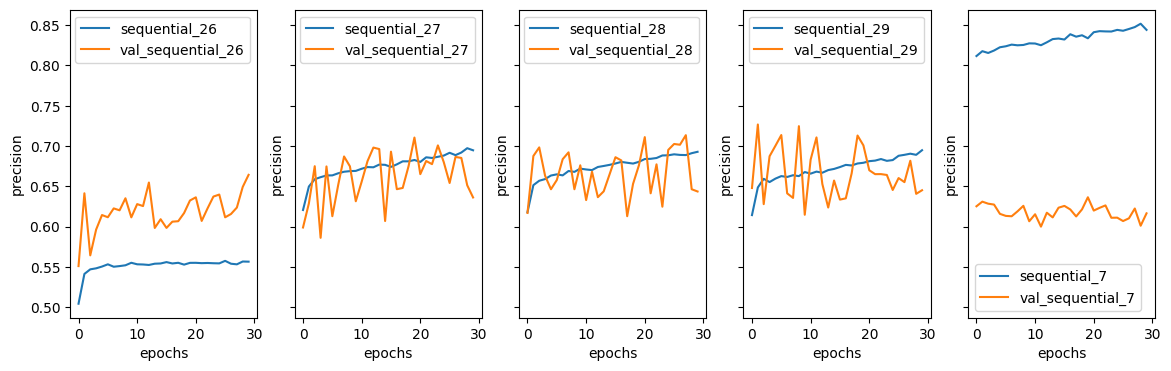

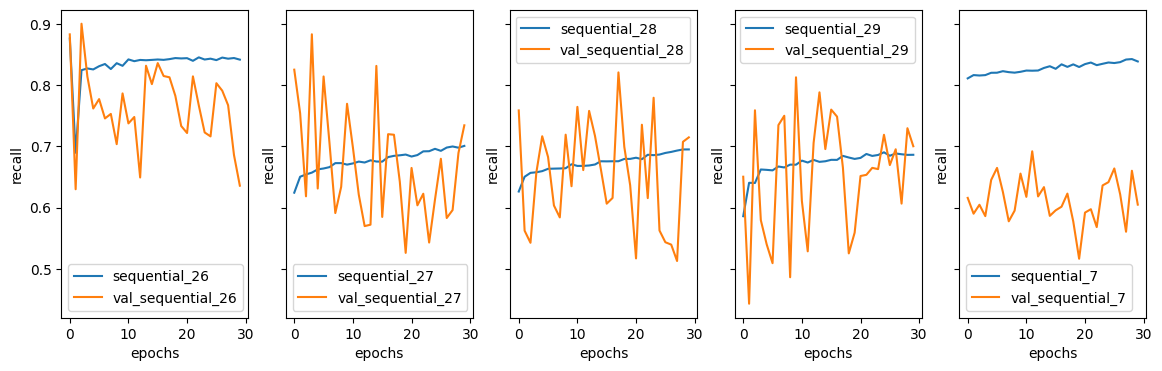

In [113]:
# Plot training & model comparison

graph_list = ['accuracy', 'loss', 'precision', 'recall']

for graph in graph_list:
	fig, ax = plt.subplots(1, len(model_list), sharex=True, sharey=True, figsize=(14, 4))
	for i, mod in enumerate(model_list):
		ax[i].plot(trained_models['model_' + str(mod.name)][graph], label=mod.name)
		ax[i].plot(trained_models['model_' + str(mod.name)]['val_' + graph], label='val_' + mod.name)
		ax[i].set_xlabel("epochs")
		ax[i].set_ylabel(graph)
		ax[i].legend()
	plt.savefig('plots/cnn/' + graph + '_comparison.png')
	plt.show()

el modelo escogido es el modelo model_1_gpt que muestra mejor proyección en las epochs, se procede a entrenarlo en un ciclo más grande de epochs

In [117]:
print(model_1_gpt.summary())

compile_model(model_1_gpt)

def train_models(model, train, test, epochs=50, verbose=True, batch_size=512):
	print('Iniciando entrenamiento de modelo: ' + str(model.name))
	historial = model.fit(train.drop(['winner_team'], axis=1), train['winner_team'], epochs=epochs, verbose=verbose, batch_size=batch_size, validation_data=(test.drop(['winner_team'], axis=1), test['winner_team']))
	return historial

result = train_models(model_1_gpt, train, test, 200, True, 512)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_29 (Conv1D)          (None, 672, 32)           128       
                                                                 
 max_pooling1d_25 (MaxPoolin  (None, 336, 32)          0         
 g1D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 10752)             0         
                                                                 
 dense_83 (Dense)            (None, 64)                688192    
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_84 (Dense)            (None, 1)                 65        
                                                     

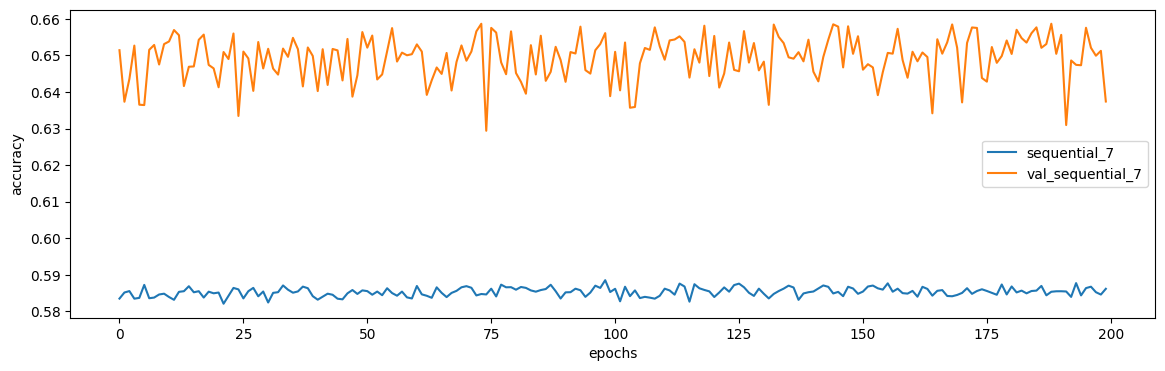

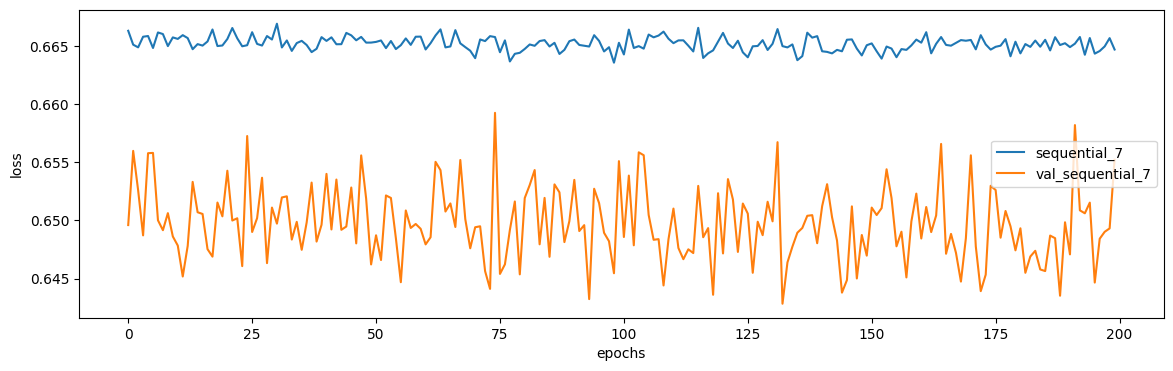

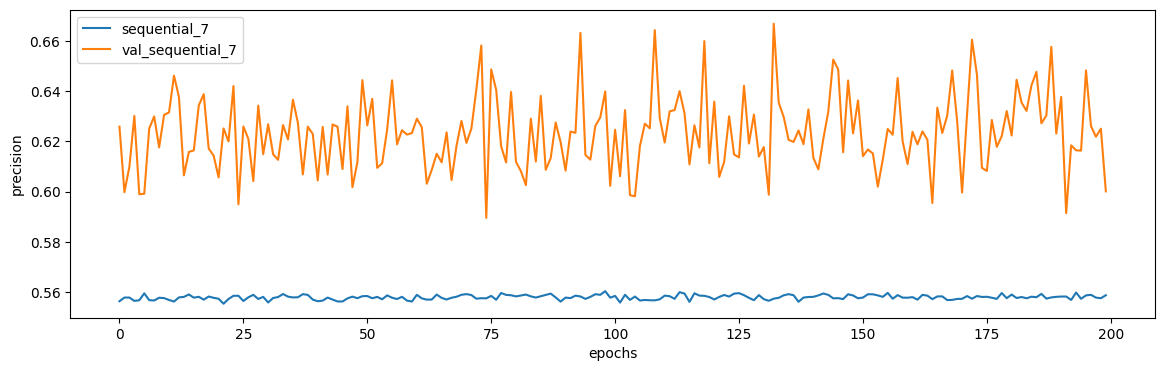

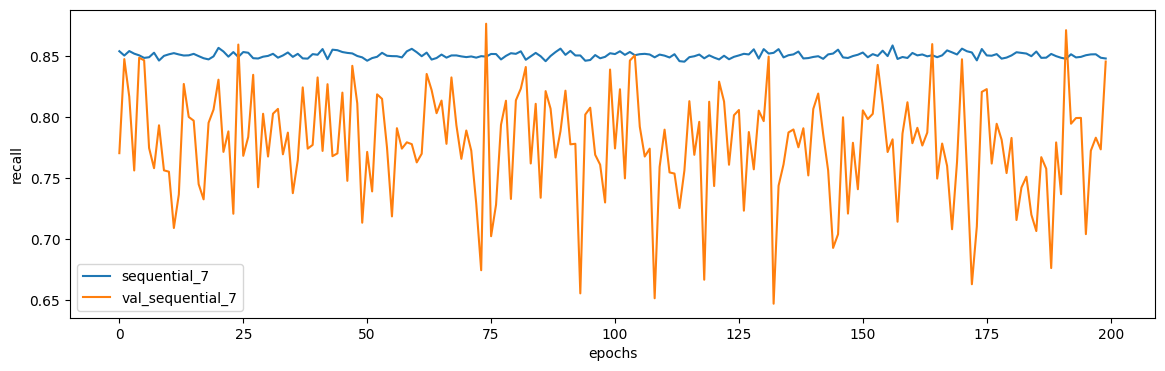

In [118]:
# Plot training & model comparison

graph_list = ['accuracy', 'loss', 'precision', 'recall']

for graph in graph_list:
	fig, ax = plt.subplots(figsize=(14, 4))
	ax.plot(result.history[graph], label=mod.name)
	ax.plot(result.history['val_' + graph], label='val_' + mod.name)
	ax.set_xlabel("epochs")
	ax.set_ylabel(graph)
	ax.legend()
	plt.savefig('plots/cnn/' + graph + '_final.png')
	plt.show()

In [14]:
# test['prediction'] = model_1.predict(test.drop(['winner'], axis=1))
# test['prediction_result'] = test['prediction'].apply(lambda x: True if x > 0.5 else False).astype(bool)

# def get_metrics(test):
# 	true_positives = test[(test['winner'] == True) & (test['winner'] == test['prediction_result'])].shape[0]
# 	true_negatives = test[(test['winner'] == False) & (test['winner'] == test['prediction_result'])].shape[0]
# 	false_positives = test[(test['winner'] == False) & (test['winner'] != test['prediction_result'])].shape[0]
# 	false_negatives = test[(test['winner'] == True) & (test['winner'] != test['prediction_result'])].shape[0]
# 	return true_positives, true_negatives, false_positives, false_negatives

# true_positives_test, true_negatives_test, false_positives_test, false_negatives_test = get_metrics(test)

In [121]:
false_positives_train = result.history['false_positives'][-1]
false_negatives_train = result.history['false_negatives'][-1]
true_positives_train = result.history['true_positives'][-1]
true_negatives_train = result.history['true_negatives'][-1]
f1_score_train = 2 * (true_positives_train / (2 * true_positives_train + false_positives_train + false_negatives_train))
accuracy_train = (true_positives_train + true_negatives_train) / (true_positives_train + true_negatives_train + false_positives_train + false_negatives_train)

print('F1 Score Train: ' + str(f1_score_train))
print('Accuracy Train: ' + str(accuracy_train))

F1 Score Train: 0.6737204096051209
Accuracy Train: 0.5861789758925583


In [126]:
evaluate_test = model_1_gpt.evaluate(test.drop(['winner_team'], axis=1), np.asarray(test['winner_team']).astype(np.float32), batch_size=512)
false_negatives_test = evaluate_test[4]
false_positives_test = evaluate_test[5]
true_negatives_test = evaluate_test[6]
true_positives_test = evaluate_test[7]

f1_score_test = 2 * (true_positives_test / (2 * true_positives_test + false_positives_test + false_negatives_test))
accuracy_test = (true_positives_test + true_negatives_test) / (true_positives_test + true_negatives_test + false_positives_test + false_negatives_test)

print('F1 Score Test: ' + str(f1_score_test))
print('Accuracy Test: ' + str(accuracy_test))

423/423 [==============================] - 23s 54ms/step - loss: 0.6552 - accuracy: 0.6374 - precision: 0.6001 - recall: 0.8458 - false_negatives: 16836.0000 - false_positives: 61536.0000 - true_negatives: 45421.0000 - true_positives: 92337.0000
F1 Score Test: 0.7020597157911544
Accuracy Test: 0.6373849072317587


In [127]:
# Guardar el Modelo
model.save('models/cnn_model_finalized.h5')